# Koonj Shah

# 8840641 

# Lab 5

Utilize the diabetes dataset from lab 4. Perform cross-validation on nine polynomial models, ranging from degree 0 to 8. (2 points)

In [24]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Load the diabetes dataset
X, y = load_diabetes(as_frame=True, scaled=False, return_X_y=True)

In [25]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0


In [26]:
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [27]:
# Define a function to perform cross-validation for polynomial degrees
def cross_val_poly(degree):
    # Create a polynomial regression model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    # Perform cross-validation and calculate the mean absolute error
    mae_scores = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')

    return mae_scores

# Perform cross-validation for degrees 0 to 8
degree_range = range(9)
mae_scores = [cross_val_poly(degree) for degree in degree_range]

# Print the mean absolute errors for each degree
for degree, scores in zip(degree_range, mae_scores):
    print(f'Degree {degree} - Mean Absolute Error: {scores.mean():.2f}')

# Find the degree with the lowest mean absolute error
best_degree = min(degree_range, key=lambda i: mae_scores[i].mean())
print(f'Best Degree: {best_degree}')

Degree 0 - Mean Absolute Error: 66.05
Degree 1 - Mean Absolute Error: 44.28
Degree 2 - Mean Absolute Error: 67.38
Degree 3 - Mean Absolute Error: 330.43
Degree 4 - Mean Absolute Error: 657.26
Degree 5 - Mean Absolute Error: 562.99
Degree 6 - Mean Absolute Error: 742.59
Degree 7 - Mean Absolute Error: 1032.68
Degree 8 - Mean Absolute Error: 1475.66
Best Degree: 1


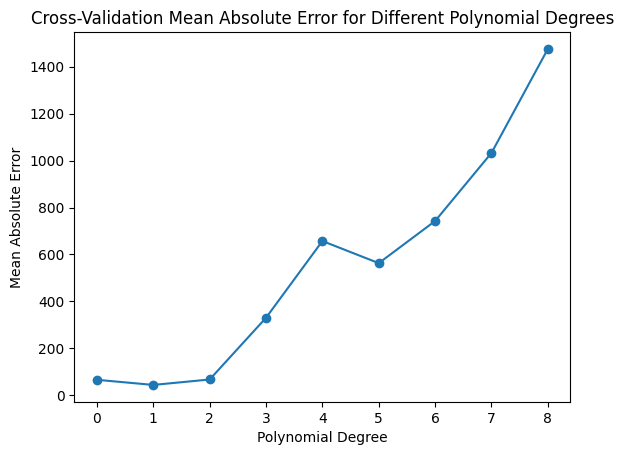

In [28]:
# You can also plot the mean absolute errors for each degree
plt.plot(degree_range, [scores.mean() for scores in mae_scores], marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Absolute Error')
plt.title('Cross-Validation Mean Absolute Error for Different Polynomial Degrees')
plt.show()

Construct a table summarizing the cross-validation results. Each model should have a separate row in the table. Include the R-Squared and Mean Absolute Error (MAE) metrics for each model. Calculate the mean value and standard deviation of these metrics from the cross-validation. Include both values. (2 points)

In [29]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_absolute_error, make_scorer, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Load the diabetes dataset
X, y = load_diabetes(as_frame=True, scaled=False, return_X_y=True)

# Define a function to perform cross-validation for polynomial degrees
def cross_val_metrics(degree):
    # Create a polynomial regression model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    # Perform cross-validation and calculate R-squared and MAE
    r2_scores = cross_val_score(model, X, y, cv=5, scoring=make_scorer(r2_score))
    mae_scores = -cross_val_score(model, X, y, cv=5, scoring=make_scorer(mean_absolute_error))

    return {
        'Degree': degree,
        'R-squared Mean': r2_scores.mean(),
        'R-squared Std': r2_scores.std(),
        'MAE Mean': mae_scores.mean(),
        'MAE Std': mae_scores.std()
    }

# Create a list of results for degrees 0 to 8
results = [cross_val_metrics(degree) for degree in range(9)]

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)

# Print the results table
print(results_df)

   Degree  R-squared Mean  R-squared Std     MAE Mean     MAE Std
0       0       -0.027506       0.036772   -66.045624    3.474660
1       1        0.482316       0.049269   -44.276499    2.100110
2       2       -0.859464       1.700703   -67.383310   22.688947
3       3     -199.796495     226.976670  -330.432376  147.820568
4       4     -571.083108     369.891883  -657.260477  159.475902
5       5     -436.856887     379.100423  -562.993636   59.917202
6       6    -1694.222101    2629.834958  -742.589052  190.836052
7       7    -5530.894075    9518.586954 -1032.681725  393.439617
8       8   -16076.255117   28049.952579 -1475.658532  706.280274


Identification of the Best Model: Identify the model that exhibits the highest performance based on the R-Squared and MAE metrics. Provide an explanation for choosing this specific model

In [30]:
# Sort the results DataFrame by R-squared (highest to lowest) and then by MAE (lowest to highest)
sorted_results = results_df.sort_values(by=['R-squared Mean', 'MAE Mean'], ascending=[False, True])

# Print the sorted results
print(sorted_results)

# Choose the best model based on your criteria
best_model = sorted_results.iloc[0]

# Print the best model
print("Best Model:")
print(best_model)

   Degree  R-squared Mean  R-squared Std     MAE Mean     MAE Std
1       1        0.482316       0.049269   -44.276499    2.100110
0       0       -0.027506       0.036772   -66.045624    3.474660
2       2       -0.859464       1.700703   -67.383310   22.688947
3       3     -199.796495     226.976670  -330.432376  147.820568
5       5     -436.856887     379.100423  -562.993636   59.917202
4       4     -571.083108     369.891883  -657.260477  159.475902
6       6    -1694.222101    2629.834958  -742.589052  190.836052
7       7    -5530.894075    9518.586954 -1032.681725  393.439617
8       8   -16076.255117   28049.952579 -1475.658532  706.280274
Best Model:
Degree             1.000000
R-squared Mean     0.482316
R-squared Std      0.049269
MAE Mean         -44.276499
MAE Std            2.100110
Name: 1, dtype: float64


This piece of code organizes the results in the DataFrame based on two essential metrics, R-Squared and MAE. Initially, it arranges them in descending order of R-Squared, with the highest values listed first. This is indicative of how well a model fits the data. Afterward, within the same R-Squared values, it further organizes the models in ascending order of MAE, with the lowest values positioned at the top. This suggests how accurately a model makes predictions.

The selection of the best model is made by considering both of these metrics. The optimal model will possess the highest R-Squared, indicating its ability to explain a substantial portion of the data's variance and its excellent fit to the data. Simultaneously, it will have the lowest MAE, signifying that it can make precise predictions with minimal errors.

It's crucial to understand that the choice of the best model can be influenced by the specific objectives of your analysis. If the primary aim is to find a model that closely represents the data (goodness of fit),we would lean towards the model with the highest R-Squared. Alternatively, if the primary concern is accurate prediction, We would favor the model with the lowest MAE.